
## Introduction

I pulled marriage and divorce rates directly from the CDC (1990–2021) because it’s the most reliable, official source—covering every state year by year. I needed data I could trust, so I could dig in and really see how these rates shift over time across the U.S. 

In [66]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
import pandas as pd

In [67]:
marriage_url = 'https://www.cdc.gov/nchs/data/dvs/marriage-divorce/state-marriage-rates-90-95-00-23.xlsx'
divorce_url  = 'https://www.cdc.gov/nchs/data/dvs/marriage-divorce/state-divorce-rates-90-95-00-23.xlsx'

In [68]:
data = pd.read_excel(marriage_url,header = 5)
data 

,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.9,7.3,7.6,7.2,6.7,6.8,7.0,7.1,7.4,...,8.9,9.2,9.2,9.4,9.6,9.9,9.4,10.1,9.8,10.6
2,Alaska,6.4,6.5,6.3,5.7,6.5,6.7,6.9,7.1,7.4,...,8.5,8.2,8.2,8.5,8.1,8.3,8.1,8.9,9.0,10.2
3,Arizona,5.6,5.8,5.4,4.9,5.3,5.5,5.8,5.9,5.9,...,6.4,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.8,10.0
4,Arkansas,7.8,7.9,8.2,7.8,8.4,8.9,9.5,9.9,10.0,...,12.0,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.4,15.3
5,California 1,5.5,5.7,5.2,3.2,5.7,6.0,6.3,6.5,6.2,...,6.2,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.3,7.9
6,Colorado,7.8,7.5,7.4,6.7,7.3,7.6,7.3,7.4,6.8,...,7.1,7.2,7.6,7.4,7.8,8,8.2,8.3,9.0,9.8
7,Connecticut,6.2,6.0,5.4,4.3,5.0,5.3,5.6,5.6,5.3,...,5.5,5.5,5.8,5.8,5.5,5.7,5.4,5.7,6.6,7.9
8,Delaware,4.7,5.1,4.9,4.4,5.0,5.2,5.5,5.6,5.7,...,5.7,5.9,5.9,6.1,6,6.4,6.5,6.5,7.3,8.4
9,District of Columbia,8.6,8.3,7.3,6.5,7.8,7.8,8.2,8.1,8.2,...,4.2,4,4.1,5.2,5.1,5.1,6.2,4.9,6.1,8.2


In [69]:
data1 = data.rename(columns = {'Unnamed: 0' :'State'})
data1.head()

,State,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.9,7.3,7.6,7.2,6.7,6.8,7.0,7.1,7.4,...,8.9,9.2,9.2,9.4,9.6,9.9,9.4,10.1,9.8,10.6
2,Alaska,6.4,6.5,6.3,5.7,6.5,6.7,6.9,7.1,7.4,...,8.5,8.2,8.2,8.5,8.1,8.3,8.1,8.9,9.0,10.2
3,Arizona,5.6,5.8,5.4,4.9,5.3,5.5,5.8,5.9,5.9,...,6.4,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.8,10.0
4,Arkansas,7.8,7.9,8.2,7.8,8.4,8.9,9.5,9.9,10.0,...,12.0,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.4,15.3


In [70]:
# remove irrelevent rows 
data1 = data1.drop([0,52,53,54,55,56,57,58])

In [71]:
data1 = data1.iloc[:,:].replace({'---':np.nan}).infer_objects(copy=False)
data1.head() #replace. --- with Nan values 

/var/folders/qr/mbvj8nwx4ndck31s7d51y49c0000gn/T/ipykernel_1496/783824368.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1 = data1.iloc[:,:].replace({'---':np.nan}).infer_objects(copy=False)


,State,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
1,Alabama,6.9,7.3,7.6,7.2,6.7,6.8,7.0,7.1,7.4,...,8.9,9.2,9.2,9.4,9.6,9.9,9.4,10.1,9.8,10.6
2,Alaska,6.4,6.5,6.3,5.7,6.5,6.7,6.9,7.1,7.4,...,8.5,8.2,8.2,8.5,8.1,8.3,8.1,8.9,9.0,10.2
3,Arizona,5.6,5.8,5.4,4.9,5.3,5.5,5.8,5.9,5.9,...,6.4,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.8,10.0
4,Arkansas,7.8,7.9,8.2,7.8,8.4,8.9,9.5,9.9,10.0,...,12.0,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.4,15.3
5,California 1,5.5,5.7,5.2,3.2,5.7,6.0,6.3,6.5,6.2,...,6.2,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.3,7.9


In [72]:
data1 = data1.fillna(data1.iloc[:,1:].median()) #fill the null value with median
data1.head()

,State,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
1,Alabama,6.9,7.3,7.6,7.2,6.7,6.8,7.0,7.1,7.4,...,8.9,9.2,9.2,9.4,9.6,9.9,9.4,10.1,9.8,10.6
2,Alaska,6.4,6.5,6.3,5.7,6.5,6.7,6.9,7.1,7.4,...,8.5,8.2,8.2,8.5,8.1,8.3,8.1,8.9,9.0,10.2
3,Arizona,5.6,5.8,5.4,4.9,5.3,5.5,5.8,5.9,5.9,...,6.4,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.8,10.0
4,Arkansas,7.8,7.9,8.2,7.8,8.4,8.9,9.5,9.9,10.0,...,12.0,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.4,15.3
5,California 1,5.5,5.7,5.2,3.2,5.7,6.0,6.3,6.5,6.2,...,6.2,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.3,7.9


In [73]:
# extract matrice 
year_marriage = data1.columns[1:].to_numpy().astype(float)

StateM = data1.iloc[:,0]
StateM 

M = np.round(data1.iloc[:,1:].to_numpy(),2)

In [74]:
year_marriage.shape

(26,)

In [75]:
M.shape,StateM.shape

((51, 26), (51,))

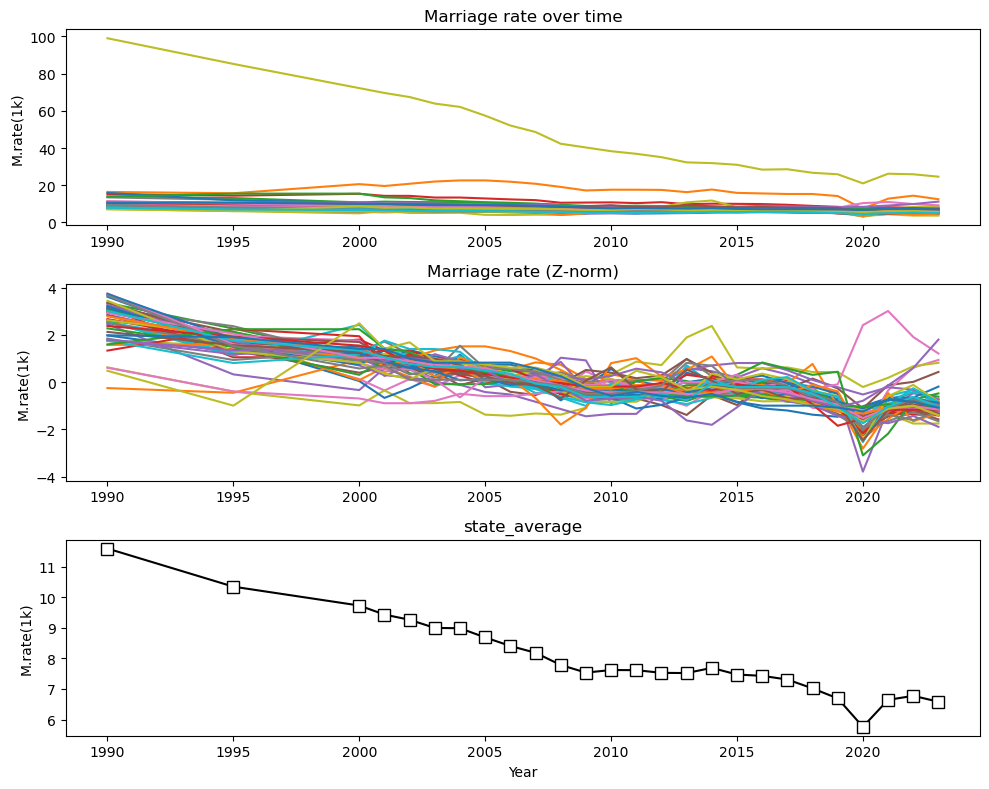

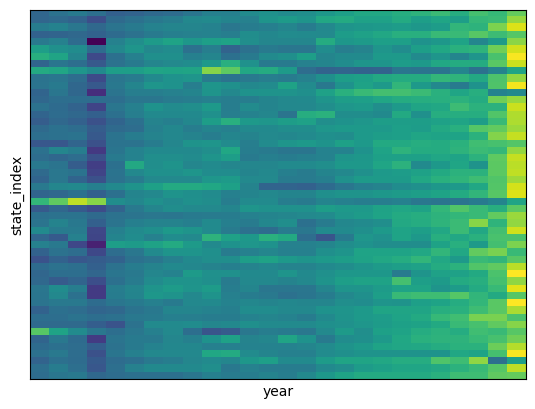

In [76]:
#plot
fig,ax = plt.subplots(3,1,figsize = (10,8)) 
ax[0].plot(year_marriage,M.T)
ax[0].set_ylabel('M.rate(1k)')
ax[0].set_title('Marriage rate over time')

#Normilzing with zscore
ax[1].plot(year_marriage, stats.zscore(M.T))
ax[1].set_ylabel('M.rate(1k)')
ax[1].set_title('Marriage rate (Z-norm)')

# notice that x-axis is non constant 
ax[2].plot(year_marriage, np.mean(M,axis = 0),'ks-',markerfacecolor = 'w',markersize = 8)
ax[2].set_ylabel('M.rate(1k)')
ax[2].set_xlabel('Year')
ax[2].set_title('state_average')
plt.tight_layout()
plt.show()
#IS this the same as US average?

plt.imshow(stats.zscore(M,axis = 1),aspect = 'auto')
plt.xticks([])
plt.yticks([])
plt.xlabel('year')
plt.ylabel('state_index')
plt.colorbar
plt.show()


## Overview of Marriage-Rate Trends

1. **All states, raw data (top panel)**  
   You see every state’s marriage rate from 1990 to 2021. Some start high (around 15–20 per 1k) and most slide down toward single digits by 2021. It’s noisy, but you can spot a few outliers with big spikes or dips.

2. **All states, Z-normalized (middle panel)**  
   Here each state’s line is centered and scaled so they all start around zero. Now it’s obvious that almost every state follows the same downward path, with only a handful of weird bumps (like around 2020).

3. **National average (bottom panel)**  
   This single black line is just the average across all 51 curves. It falls steadily from about 11 per 1k in 1990 to around 6 per 1k in 2021, with a small dip around 2020. It’s the simplest way to see the big-picture decline.

> **Bottom line:**  
> Marriage rates have been sliding downward for three decades, and despite some state-by-state noise, the whole country moves in roughly the same direction.  

### We notice a big outliere for intance Nevada in the barplot. Is Nevada a non representaive data points or an error?

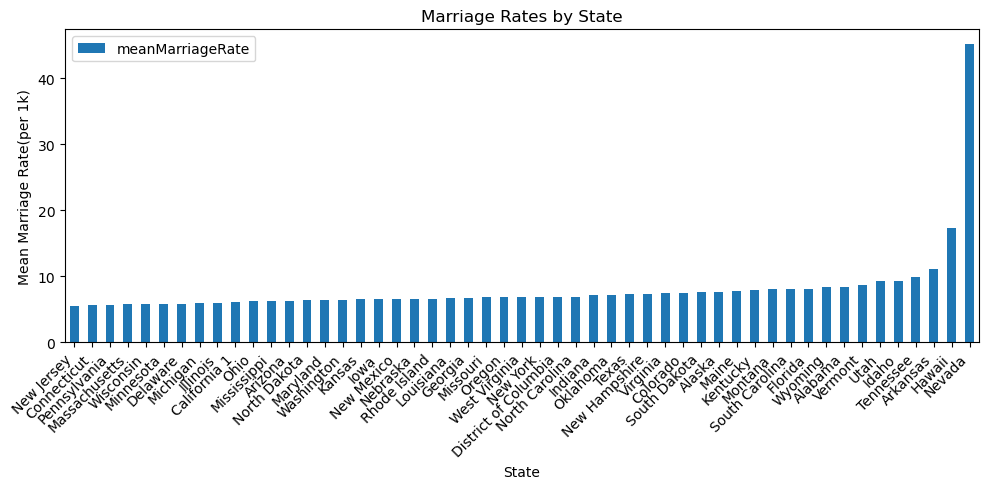

In [77]:
meanMarriageRate = data1.iloc[:,1:].mean(axis = 1)

State = data1['State'].sort_values(ascending = False)

df = pd.concat([State,meanMarriageRate.rename("meanMarriageRate")],axis = 1 )

#sorting the MeanMarriageRate from low to high 
df_sorted = df.sort_values(by="meanMarriageRate", ascending=True)

#pltting
df_sorted .plot.bar(x='State', y='meanMarriageRate', figsize=(10, 5));
plt.xlabel("State")                         
plt.ylabel("Mean Marriage Rate(per 1k)")     
plt.title("Marriage Rates by State")  # an overall title
plt.xticks(rotation=45, ha="right")    # tilt the state names so they don’t overlap
plt.tight_layout()                     # nice spacing
plt.show()




## Why Nevada’s Marriage Rate Looks So High

When you look at how many marriages happen for every 1,000 people in each state, Nevada really sticks out. At first you might think it’s a mistake, but here’s why: Las Vegas brings in thousands of couples from outside the state every year. In 2022, Clark County gave out over 74,000 marriage licenses—almost 4% of all weddings in the U.S.—and most of those couples do not live in Nevada.

Nevada’s official rate counts every ceremony done in the state and then divides by about 3 million people who live there. Because so many out-of-state visitors get married in Vegas, Nevada’s number ends up way higher than other states.

**Destination weddings make the number big**  
Couples travel from California, Texas, even other countries to get married in Las Vegas. Those weddings push Nevada’s total far above what its own residents generate.

**CDC counts by where you marry, not where you live**  
This is called “state of occurrence.” For instance, Nevada’s 2022 rate was about 25.9 marriages per 1,000 residents. Compare that to Hawaii at 14.4 or the U.S. average around 6. Other states usually count mostly their own residents, so their numbers stay more “normal.”

In short, Nevada’s tall bar on the chart isn’t a typo—it just shows how many people come to Las Vegas to tie the knot.

---

**Sources**  
- CDC, “Marriages in the U.S. in 2022 Returned to Pre-Pandemic Levels,” March 15, 2024.  
- CDC, “Fact or Fiction: Is Nevada the Marriage Capital of the U.S.?” December 23, 2013.  
- Wikipedia, “Las Vegas weddings,” (accessed April 2024).  
  https://en.wikipedia.org/wiki/Las_Vegas_weddings

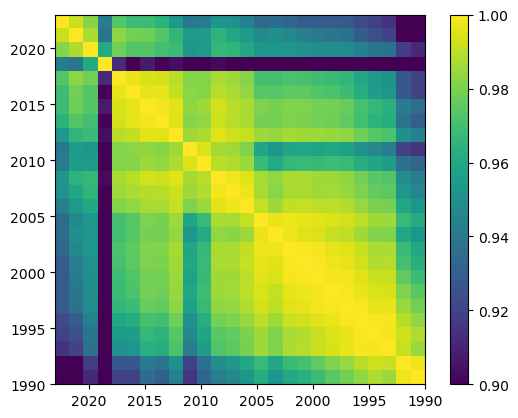

In [78]:
#show the correlation matrix

plt.imshow(np.corrcoef(M.T),vmin = .9,vmax = 1,
           extent = [year_marriage[0],year_marriage[-1],year_marriage[-1],year_marriage[0]])
plt.colorbar()
plt.show()

This heatmap shows how marriage rates line up from year to year. The bright yellow diagonal is each year versus itself—so those are perfect matches. Just off that diagonal, like 2005 vs. 2006, you see mostly yellow-green, which means those two years were almost identical. As you look at years farther apart (say 1990 vs. 2020), the squares turn a bit darker green—still very similar, but not a perfect match. That purple stripe around 2015 is interesting: it tells you 2015’s data didn’t really line up with any other year. Bottom line: marriage rates stay pretty stable from one year to the next, except 2015 stands out as different.


In [79]:
from sklearn.decomposition import PCA

# 2. Create a PCA object (keep all components by default)
pca = PCA()
# 3. Fit the PCA data
pca.fit(M)

# 4. Print the fraction of total variance explained by each principal component
print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)

Explained variance ratio for each component:
[9.77730360e-01 1.40983364e-02 3.67600422e-03 1.87670678e-03
 7.75448279e-04 4.84187991e-04 2.58892356e-04 2.04734165e-04
 2.01995754e-04 1.17515798e-04 8.88594862e-05 8.32945809e-05
 7.50776482e-05 6.46385187e-05 5.59398644e-05 5.45729442e-05
 3.24974825e-05 3.06246289e-05 2.16506973e-05 2.00320842e-05
 1.39004820e-05 1.22957093e-05 9.59529270e-06 6.69207254e-06
 3.89403911e-06 2.25234106e-06]


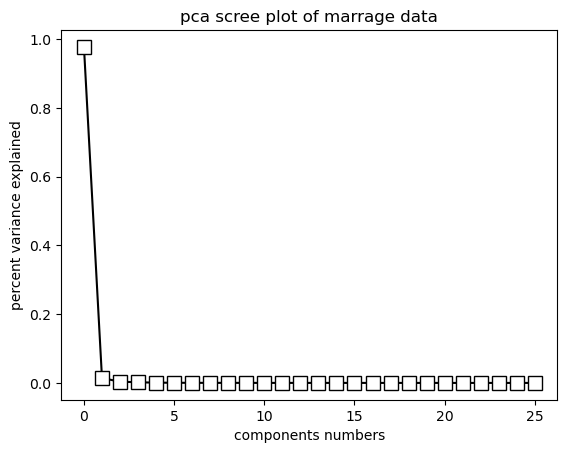

In [80]:
#Let's plot 
plt.plot(pca.explained_variance_ratio_,'ks-',markerfacecolor = 'w',markersize = 10)
plt.ylabel('percent variance explained')
plt.xlabel('components numbers')
plt.title('pca scree plot of marrage data')
plt.show()

##Take on the PCA Scree Plot


- **PC1.** It explains about **97.8%** of the variance—basically one number summarizes 26 years of marriage rates.  
- **PC2 and beyond add almost nothing.** PC2 adds just **1.4%**, and by PC5 you’re under **0.1%**. Those later PCs only capture tiny bumps in a year or two.  
- **What this means:** You can collapse your 26-dimensional data down to one (or two) components with almost no loss.  
- **Next up:**  
  - Use **PC1** as each state’s “marriage index” for ranking or mapping.  
  - Plot **PC1 vs. PC2** to spot any oddballs.  
  - Feed those PCs into clustering or regression for deeper insights.

> **Note:** Marriage rates move so in sync that one principal component tells the whole story.  

In [81]:
#Reading divoce dataset
data_Di = pd.read_excel(divorce_url,header = 5)
data_Di

,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,3,3.2,3.6,3.7,3.6,3.7,3.7,3.8,3.9,...,4.5,4.9,4.9,4.9,5.2,5.4,5.4,5.5,6,6.1
2,Alaska,3.1,3,3.1,3.2,3.6,3.7,3.6,3.9,4.1,...,4.3,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5,5.5
3,Arizona,2,2.3,2.7,2.9,2.9,3,3.5,3.4,3.6,...,4,4,4.2,4.3,4.4,4.8,4,4.6,6.2,6.9
4,Arkansas,3,3.5,3.6,3.6,4,4.1,3.7,3.9,4.8,...,5.9,5.8,6,6.1,6,6.2,6.2,6.4,6.3,6.9
5,California,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,4.3
6,Colorado,2.8,2.9,3,2.9,3.3,3.3,3.2,3.6,3.7,...,4.4,4.5,4.4,4.4,4.3,4.7,4.7,4.7,---,5.5
7,Connecticut,2.6,2.8,2.5,1.6,2.7,2.9,2.9,3.2,3.1,...,3.2,3.1,3,3.1,3.2,3.3,3.2,3.3,2.9,3.2
8,Delaware,2.6,2.3,2.6,2.3,2.9,2.8,3,3.1,3.1,...,3.7,3.8,3.8,3.7,3.9,3.5,3.9,3.9,5,4.4
9,District of Columbia,1.9,2,2.6,2.1,2.4,2.5,2.5,2.7,2.8,...,1.7,2.1,2,1.8,2,2.4,2.9,3.2,3.2,4.5


In [82]:
data_Di.drop([0,52,53,54,55,56,57],axis = 0,inplace = True)

In [83]:
data_Di

,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
1,Alabama,3,3.2,3.6,3.7,3.6,3.7,3.7,3.8,3.9,...,4.5,4.9,4.9,4.9,5.2,5.4,5.4,5.5,6,6.1
2,Alaska,3.1,3,3.1,3.2,3.6,3.7,3.6,3.9,4.1,...,4.3,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5,5.5
3,Arizona,2,2.3,2.7,2.9,2.9,3,3.5,3.4,3.6,...,4,4,4.2,4.3,4.4,4.8,4,4.6,6.2,6.9
4,Arkansas,3,3.5,3.6,3.6,4,4.1,3.7,3.9,4.8,...,5.9,5.8,6,6.1,6,6.2,6.2,6.4,6.3,6.9
5,California,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,4.3
6,Colorado,2.8,2.9,3,2.9,3.3,3.3,3.2,3.6,3.7,...,4.4,4.5,4.4,4.4,4.3,4.7,4.7,4.7,---,5.5
7,Connecticut,2.6,2.8,2.5,1.6,2.7,2.9,2.9,3.2,3.1,...,3.2,3.1,3,3.1,3.2,3.3,3.2,3.3,2.9,3.2
8,Delaware,2.6,2.3,2.6,2.3,2.9,2.8,3,3.1,3.1,...,3.7,3.8,3.8,3.7,3.9,3.5,3.9,3.9,5,4.4
9,District of Columbia,1.9,2,2.6,2.1,2.4,2.5,2.5,2.7,2.8,...,1.7,2.1,2,1.8,2,2.4,2.9,3.2,3.2,4.5
10,Florida,3,3.1,3.4,3,3.5,3.6,3.6,3.9,4,...,4.6,4.7,4.6,4.7,5,5.1,5.2,5.1,5.5,6.3


In [84]:
data_Di  = data_Di.rename(columns = {'Unnamed: 0' : 'StateD'})
data_Di.head()

,StateD,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
1,Alabama,3,3.2,3.6,3.7,3.6,3.7,3.7,3.8,3.9,...,4.5,4.9,4.9,4.9,5.2,5.4,5.4,5.5,6,6.1
2,Alaska,3.1,3,3.1,3.2,3.6,3.7,3.6,3.9,4.1,...,4.3,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5,5.5
3,Arizona,2,2.3,2.7,2.9,2.9,3,3.5,3.4,3.6,...,4,4,4.2,4.3,4.4,4.8,4,4.6,6.2,6.9
4,Arkansas,3,3.5,3.6,3.6,4,4.1,3.7,3.9,4.8,...,5.9,5.8,6,6.1,6,6.2,6.2,6.4,6.3,6.9
5,California,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,4.3


In [88]:
data_Di = data_Di.replace({'---':np.nan}).infer_objects(copy=False)


In [89]:
data_Di= data_Di.fillna(data_Di.median(numeric_only = True))

In [90]:
data_Di.head()

,StateD,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
1,Alabama,3.0,3.20,3.60,3.70,3.60,3.70,3.7,3.8,3.9,...,4.5,4.9,4.9,4.90,5.2,5.4,5.4,5.5,6.0,6.1
2,Alaska,3.1,3.00,3.10,3.20,3.60,3.70,3.6,3.9,4.1,...,4.3,4.2,4.3,4.30,3.9,4.6,4.3,3.9,5.0,5.5
3,Arizona,2.0,2.30,2.70,2.90,2.90,3.00,3.5,3.4,3.6,...,4.0,4.0,4.2,4.30,4.4,4.8,4.0,4.6,6.2,6.9
4,Arkansas,3.0,3.50,3.60,3.60,4.00,4.10,3.7,3.9,4.8,...,5.9,5.8,6.0,6.10,6.0,6.2,6.2,6.4,6.3,6.9
5,California,2.6,2.55,2.65,2.45,2.85,2.95,3.0,3.2,3.2,...,3.8,3.9,3.9,3.85,3.9,4.0,4.0,4.1,4.6,4.3


In [91]:
data_Di[data_Di.isna().any(axis=1)]

,StateD,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990


In [92]:
yearD = (
    data_Di.iloc[:,1:]
           .columns.to_numpy()
           .astype(float)
        )

M_D = data_Di.iloc[:,1:].to_numpy()



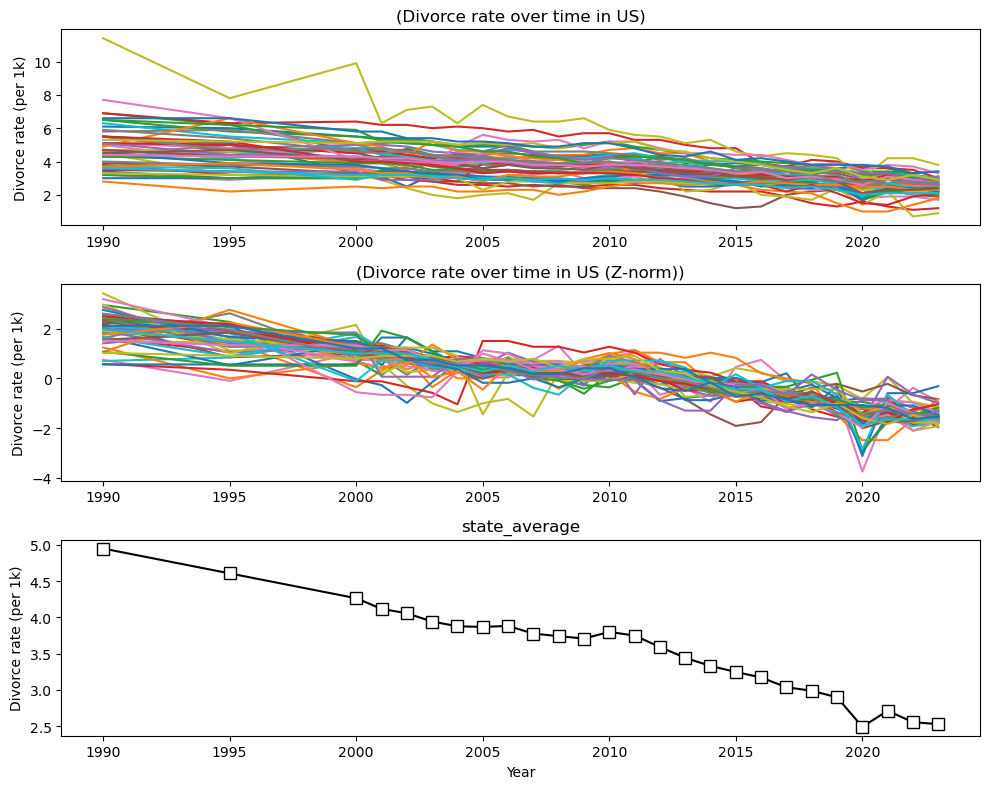

In [93]:
fig,ax = plt.subplots(3,1,figsize = (10,8))

ax[0].plot(yearD, M_D.T)
ax[0].set_ylabel('Divorce rate (per 1k)')
ax[0].set_title('(Divorce rate over time in US)')

ax[1].plot(yearD, stats.zscore(M_D.T))
ax[1].set_ylabel('Divorce rate (per 1k)')
ax[1].set_title('(Divorce rate over time in US (Z-norm))')

ax[2].plot(yearD,np.mean(M_D,axis = 0),'ks-',markerfacecolor = 'w',markersize = 8)
ax[2].set_ylabel('Divorce rate (per 1k)')
ax[2].set_xlabel('Year')
ax[2].set_title('state_average')
plt.tight_layout()
plt.show()



## Quick Take on the Divorce‐Rate Plots

1. **All states together** (top graph)  
   You can see every state’s divorce curve from 1990 to 2021. Some lines start high (around 11 per 1 000) and most drift down toward 2–4 per 1 000 by 2021. It’s a noisy spaghetti, but the overall trend is clear: divorces are declining almost everywhere.

2. **Z-normalized overlay** (middle graph)  
   Here we’ve centered and scaled each state so they all start around zero. Now it’s obvious that most states follow the same path—steady declines—with only a few jumping above or below the pack at different times.

3. **National average** (bottom graph)  
   This single black line is the straight-up average across all 51 curves. It falls from about 4.9 in 1990 to roughly 2.5 in 2021, with a small uptick around 2010. That smooth drop tells the story in one easy glance.

**Bottom line:**  
Divorce rates have trended downward for three decades, and almost every state plays along. Normalizing the data shows they move in sync, and the national average cleanly sums up the big-picture decline.  

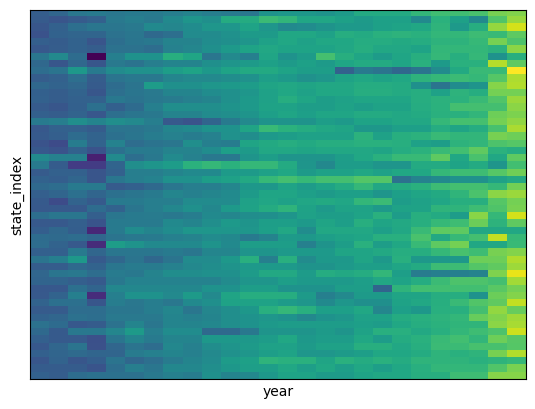

In [94]:
plt.imshow(stats.zscore(M_D,axis = 1),aspect = 'auto')
plt.xticks([])
plt.yticks([])
plt.xlabel('year')
plt.ylabel('state_index')
plt.colorbar
plt.show()


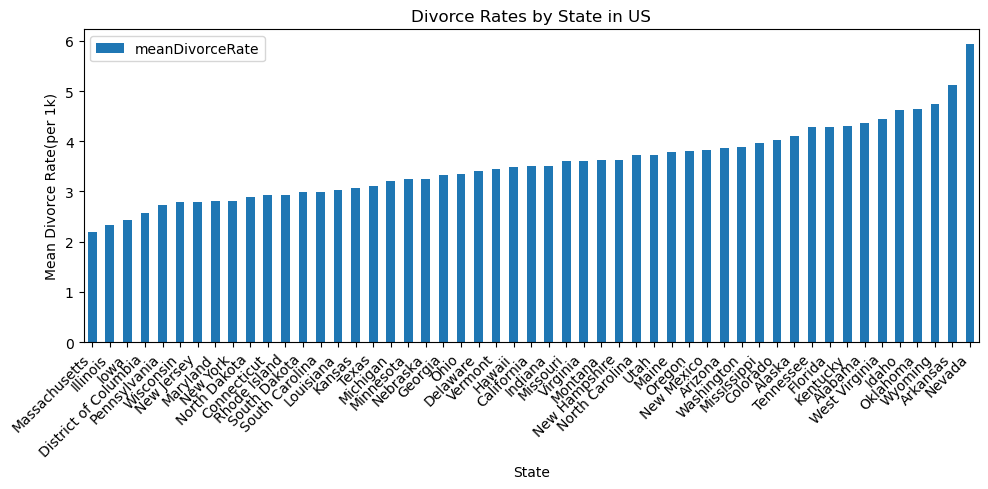

In [95]:
meanDivorceRate = data_Di.iloc[:,1:].mean(axis = 1)
StateD = data_Di['StateD'].sort_values(ascending = False)

df = pd.concat([StateD, meanDivorceRate.rename("meanDivorceRate")],axis = 1)
df_sorted = df.sort_values(by = 'meanDivorceRate',ascending = True)
df_sorted.plot.bar(x = 'StateD',y = 'meanDivorceRate',figsize = (10 ,5))

plt.xlabel("State")                         
plt.ylabel("Mean Divorce Rate(per 1k)")     
plt.title("Divorce Rates by State in US")  # an overall title
plt.xticks(rotation=45, ha="right")    # tilt the state names so they don’t overlap
plt.tight_layout()                     # nice spacing
plt.show()
 


## Take on Mean Divorce Rates by State

- **Lowest to highest:** Massachusetts sits at the bottom ( apporox 2.3 per 1 000), and Nevada tops the list (aprrox 5.9 per 1 000).  
- **Most states cluster** between 2.5 and 4.0 — there’s a gradual rise rather than sudden jumps.  
- **Standout outliers:** Nevada (highest) and Massachusetts (lowest) bracket the rest, suggesting unique local factors at each end.

Divorce rates vary state to state but mostly fall within a narrow band. A few states—Nevada’s high tourism/divorce mix and Massachusetts’s low rate—break the pattern.  

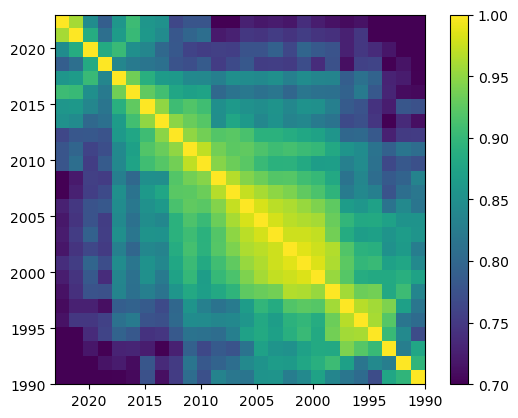

In [96]:
#show the correlation matrix

plt.imshow(np.corrcoef(M_D.T),vmin = .7,vmax = 1,
           extent = [yearD[0],yearD[-1],yearD[-1],yearD[0]])
plt.colorbar()
plt.show()

## The Divorce-Year Correlation Heatmap

- **Bright diagonal**: each year lines up perfectly with itself (correlation = 1).  
- **Just off the diagonal** (e.g. 1995 vs. 1996 or 2010 vs. 2011) you still see warm colors (~0.9–1.0), meaning divorce rates hardly change from one year to the next.  
- **Farther apart** (say 1990 vs. 2020) the colors cool a bit (down to ~0.75–0.85), so very early and very late years are slightly less similar—but still pretty close.  
- **A few darker spots** around mid-2000s hint at years that dipped or spiked differently (maybe the housing crash or policy shifts).  

> **Bottom line:**  
> Divorce rates move together steadily over three decades. Neighbors in time look almost identical, and even decades apart you still see strong correlation—with only a couple of years standing out as mildly different.  

In [97]:
from sklearn.decomposition import PCA

# 2. Creating a PCA object keeping all components by default
pca = PCA()
# 3. Fit the PCA data
pca.fit(M_D)

# 4. Print the fraction of total variance explained by each principal component
print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)

Explained variance ratio for each component:
[8.53412201e-01 4.64277725e-02 2.74676580e-02 2.15218508e-02
 1.36214509e-02 9.37717055e-03 7.20224701e-03 3.51918390e-03
 3.25337666e-03 2.70445717e-03 2.28048429e-03 1.59703926e-03
 1.20662524e-03 1.10233037e-03 1.02370109e-03 8.47190596e-04
 7.01890583e-04 5.87368477e-04 5.19235248e-04 3.94289088e-04
 3.44715987e-04 2.56543704e-04 2.19283993e-04 1.68497841e-04
 1.35485765e-04 1.07949995e-04]


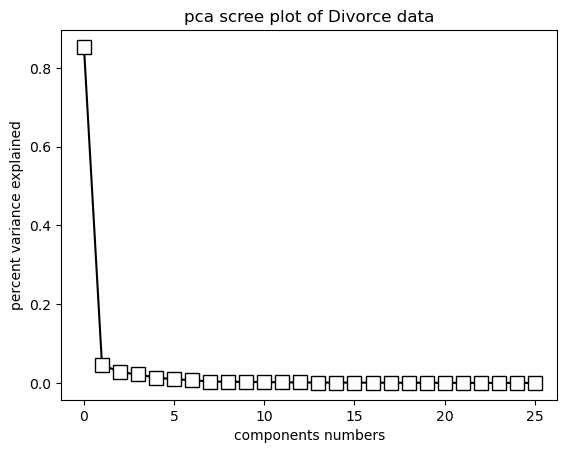

In [98]:
#Let's plot 
plt.plot(pca.explained_variance_ratio_,'ks-',markerfacecolor = 'w',markersize = 10)
plt.ylabel('percent variance explained')
plt.xlabel('components numbers')
plt.title('pca scree plot of Divorce data')
plt.show()

## Quick Take on the PCA Scree Plot for Divorce Data

- **PC1 is still king.** It explains roughly **84%** of the variance—one axis captures most of the 26-year divorce trend.  
- **PC2 adds a bit more.** Around **5%**, and PC3 another **3%**. By PC5 you’re below **1%**, so later components only catch tiny quirks.  
- **Bottom line:** You can reduce your 26-dimensional divorce data to one or two components with almost no loss.  
- **What’s next:**  
  - Treat **PC1** as each state’s “divorce-level index” for mapping or ranking.  
  - Plot **PC1 vs. PC2** to spot the few states that deviate.  
  - we Can use those PCs in clustering or regression to uncover deeper patterns.



In [99]:
#check if marraige and Divorce divorce datsets have the same year/state order

#should be zero
print('comprison of year vectors :' )
print(np.sum(year_marriage  - yearD))

#should be true 
print('')
print('comprison of year state vectors :' )
print(StateM.equals(StateD))

# cOMPARE 
tmpstateNames = pd.concat([StateM,StateD],axis = 1)
print(tmpstateNames)

#spot the inconsistency
np.where(tmpstateNames.iloc[:,0] != tmpstateNames.iloc[:,1])

comprison of year vectors :
0.0

comprison of year state vectors :
False
                   State                StateD
1                Alabama               Alabama
2                 Alaska                Alaska
3                Arizona               Arizona
4               Arkansas              Arkansas
5           California 1            California
6               Colorado              Colorado
7            Connecticut           Connecticut
8               Delaware              Delaware
9   District of Columbia  District of Columbia
10               Florida               Florida
11               Georgia               Georgia
12                Hawaii                Hawaii
13                 Idaho                 Idaho
14              Illinois              Illinois
15               Indiana               Indiana
16                  Iowa                  Iowa
17                Kansas                Kansas
18              Kentucky              Kentucky
19             Louisiana          

(array([4]),)

## Inferential Statistics
we have noticed that Marriage and divore rate are declining over a time . Now we need to find wether those decline within each state  are corrleated over years.

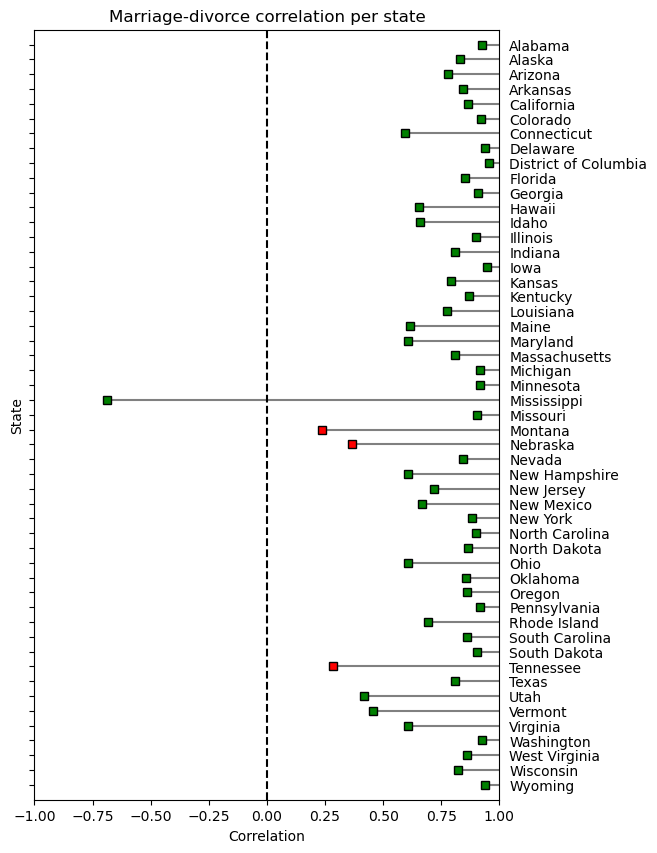

In [100]:
# correlate Marriage and Divorce over time per state
#Banferroni corrected Threshold

pvalThres = .05#/#51

fig = plt.figure(figsize = (6,10))
color = 'rg'

for si in range(len(StateM)):
    #compute the correlation
    r,p = stats.pearsonr(M[si,:],M_D[si,:])
    #plot the data points
    plt.plot([r,1],[si,si],'-',color = [.5,.5,.5])
    plt.plot(r,si,'ks',markerfacecolor = color[bool(p < pvalThres)])
    
plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage-divorce correlation per state')
plt.yticks(range(len(StateM)),labels=StateD)
plt.tick_params(axis ='y',which = 'both',labelleft = False,labelright = True)
plt.xlim([-1,1])
plt.ylim([-1,51])
plt.plot([0,0],[-1,51],'k--')
plt.show()



## What This Plot reveal

- **Each dot** is one state’s marriage-vs-divorce link from 1995 to 2020.  
- **Green squares** mean the two rates move together in a real, unlikely-by-chance way.  
- **Red squares** mean there’s no clear link (or the link could be random).  
- The **dashed line at zero** splits positive from negative.

### Main Takeaways

1. **Most states show a positive connection.**  
   When marriages go up, divorces tend to go up too—and vice versa. You can see almost all green dots sitting to the right of that zero line.

2. **Only a few states don’t follow the pattern.**  
   The red squares around the middle mean their marriage and divorce rates don’t line up neatly. Maybe their divorce rate lags by a few years or has weird bumps.

3. **No obvious “opposite” pattern.**  
   There aren’t any solid, significant red or green dots way over on the left side (strong negative). In other words, we don’t see states where more marriages consistently mean fewer divorces.

